**link to github repositry:**

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [85]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

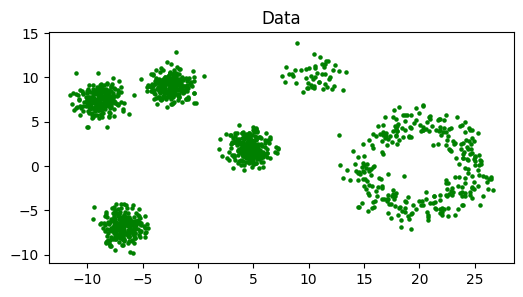

In [86]:
X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1], c='green', s=5)
plt.title("Data")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [87]:
k = 6
max_iter = 40
n_init = 10
Silhouette_score = float('-inf')

kmeans = KMeans(n_clusters=k, max_iter=max_iter, n_init=n_init)
kmeans_labels = kmeans.fit_predict(X)

if len(set(kmeans_labels)) > 1:
    Silhouette_score = silhouette_score(X, kmeans_labels)

kmeans_clusters = k
kmeans_score=Silhouette_score
print("number of clusters:", kmeans_clusters)
print("score:", kmeans_score)

number of clusters: 6
score: 0.7251181630059241


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [89]:
egglomerative_best_score = float('-inf')
best_num_clusters = 2
best_agglomerative = None
metric = 'euclidean'
linkage = 'ward'

for num in range(2, 50):
    egglomerative_clustering = AgglomerativeClustering(n_clusters=num, metric=metric, linkage=linkage)
    egglomerative_labels = egglomerative_clustering.fit_predict(X)

    score = silhouette_score(X, egglomerative_labels)

    if score > egglomerative_best_score:
        egglomerative_best_score = score
        best_num_clusters = num
        best_agglomerative = egglomerative_clustering

egglomerative_clusters = best_num_clusters
print(f"number of clusters: {egglomerative_clusters}")
print(f"score: {egglomerative_best_score}")

number of clusters: 6
score: 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [90]:
epsilon = 1
minimum_samples = 3

# Use a different variable name, like 'dbScan', to create a new instance of the DBSCAN class
dbScan_clustring = DBSCAN(eps=epsilon, min_samples=minimum_samples)
dbScan_labels = dbScan_clustring.fit_predict(X)
dbScan_clusters = len(set(dbScan_labels)) - (1 if -1 in dbScan_labels else 0)

if dbScan_clusters > 1:
    dbScan_score = silhouette_score(X, dbScan_labels)

print("num of clusters:", dbScan_clusters)
print("score:", dbScan_score)

num of clusters: 6
score: 0.713499236081091


6. Compare the results and choose the best method for the data


In [102]:
print("KMeans:\n", f"\t num Clusters: {kmeans_clusters}, Silhouette Score: {kmeans_score}")
print("\n")
print("Agglomerative Clustering:\n", f"\t num Clusters: {egglomerative_clusters}, Best Silhouette Score: {egglomerative_best_score}")
print("\n")
print("DBSCAN:\n", f"\t num Clusters: {dbScan_clusters}, Silhouette Score: {dbScan_score}")

scores = {
    "KMeans": kmeans_score,
    "Agglomerative": egglomerative_best_score,
    "DBSCAN": dbScan_score
}

print("\n")
best_method = max(scores, key=scores.get)
print(f"=> Best clustering method: {best_method}")


KMeans:
 	 num Clusters: 6, Silhouette Score: 0.7251181630059241


Agglomerative Clustering:
 	 num Clusters: 6, Best Silhouette Score: 0.7256900714288006


DBSCAN:
 	 num Clusters: 6, Silhouette Score: 0.713499236081091


=> Best clustering method: Agglomerative
